In [1]:
import pandas as pd

In [2]:
data = pd.read_excel(r"C:\Users\TJ869ZL\Downloads\kishore\baterm4\Global Superstore Orders 2016.xlsx")

In [3]:
data.shape

(51290, 24)

In [4]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

# Central Tendency before removing outliers in sales column data

In [18]:
data['Sales'].describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

In [26]:
import statistics
print('Mode :', statistics.mode(data['Sales']))

Mode : 12.96


In [27]:
# The mean , median & mode for sales data are not equal which is not a normal distribution

# Central Tendency after removing outliers in sales column data

In [33]:
from numpy import percentile
print(len(data['Sales']))
# calculate interquartile range
q25, q75 = percentile(data['Sales'], 25), percentile(data['Sales'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print(lower)
print(upper)
# Identify outliers
outliers = [x for x in data['Sales'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed_sales = [x for x in data['Sales'] if x >= lower and x <= upper]
print('Non-outlier observations or Quality rows in sales column : %d' % len(outliers_removed_sales))
import numpy as np
print('Mean :', np.mean(outliers_removed_sales))
print('Median :', np.mean(outliers_removed_sales))
print('Mode :', statistics.mode(outliers_removed_sales))

51290
Percentiles: 25th=30.759, 75th=251.053, IQR=220.295
-299.6832375
581.4950625
Identified outliers: 5655
Non-outlier observations or Quality rows in sales column : 45635
Mean : 121.65985873299003
Median : 121.65985873299003
Mode : 12.96


In [34]:
# After removing outliers the mean = median = 121.65 , mode =12.96

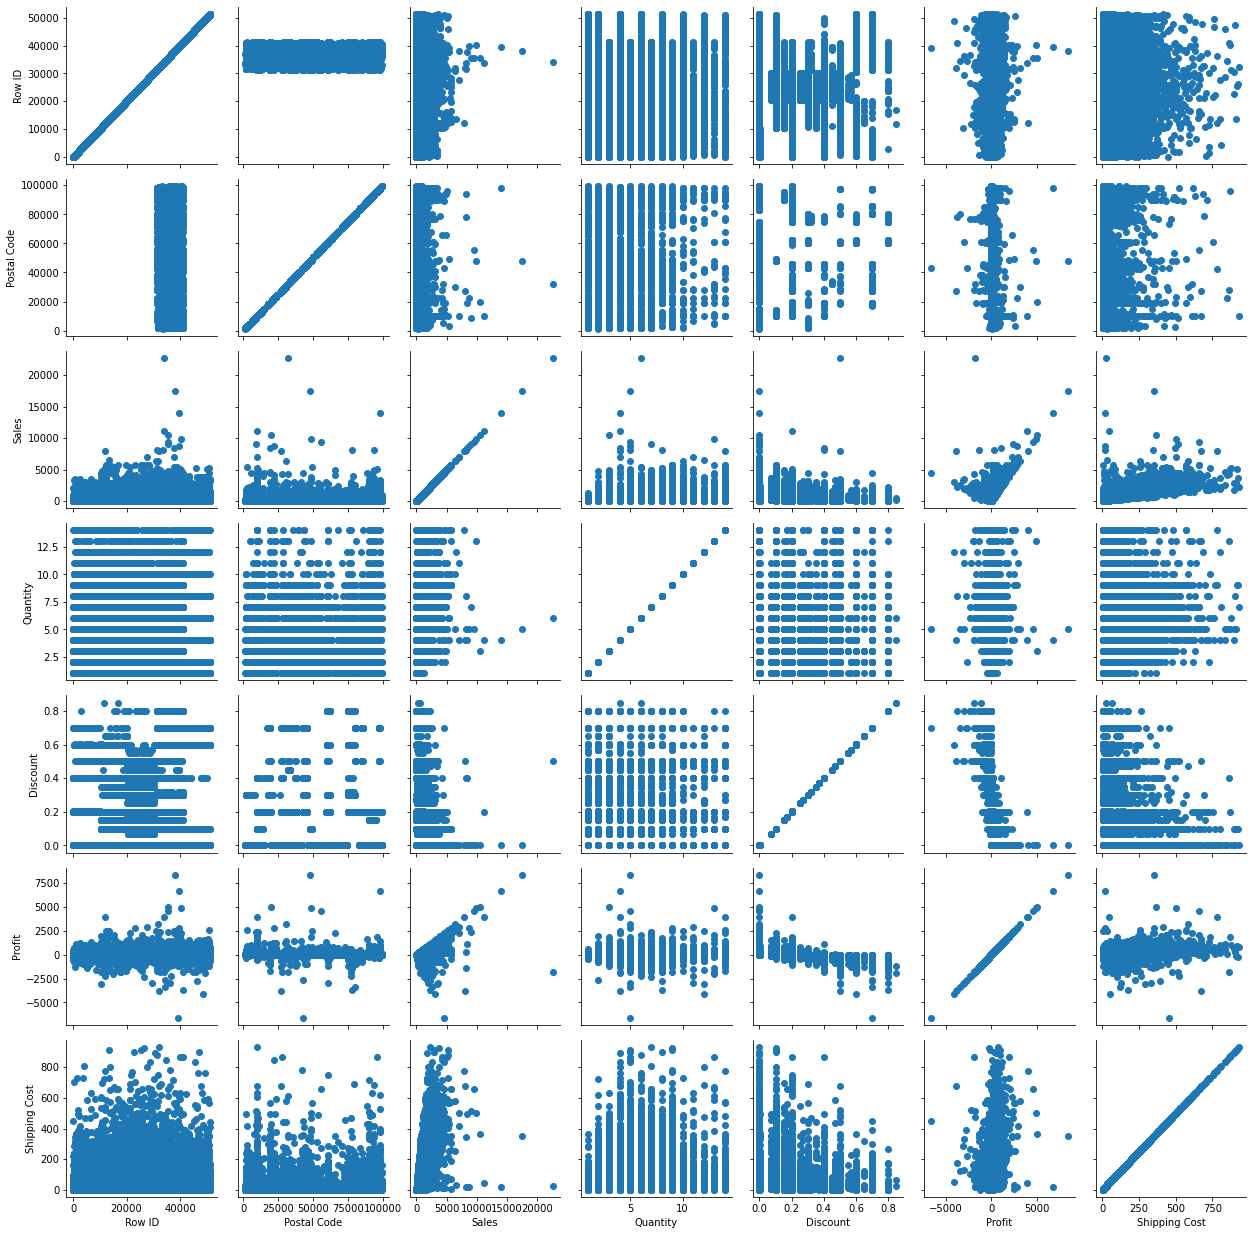

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
grids = sns.PairGrid(data)
grids.map(plt.scatter)
# Scatter Plot of dataset

<AxesSubplot:>

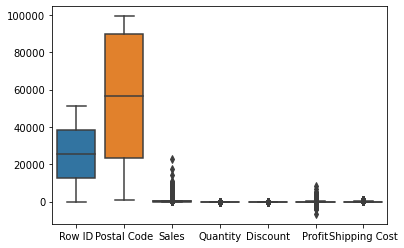

In [7]:
# Box Plot of dataset
sns.boxplot(data = data, orient = 'v')

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64

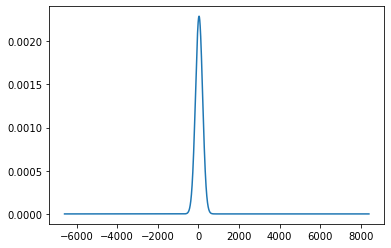

In [8]:
# Normal Distribution Graph on profit data
import numpy as np
import scipy.stats as stats
import pylab as pl
p = sorted(data['Profit'])
pdf = stats.norm.pdf(p, np.mean(p), np.std(p))
plt.plot(p,pdf)
data['Profit'].describe()

In [9]:
profits_mean = np.mean(data['Profit'])
sample_size = 10
profits_sample = np.random.choice(data['Profit'],sample_size)
from scipy.stats import ttest_1samp
ttest,p_value = ttest_1samp(profits_sample,28)
print(p_value)
if p_value < 0.05:
    print("Reject Null Hypothesis H0")
else:
    print("Accept Null Hypothesis H1")

0.6175813172936391
Accept Null Hypothesis H1


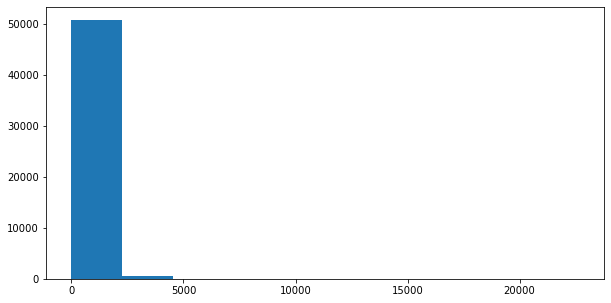

In [10]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(10,5))
pyplot.hist(data['Sales'])
pyplot.show()

In [11]:
# Normality Test using Shapiro-wilk test : tests if sales data is normally distributed
from scipy.stats import shapiro
data_to_test = data['Sales']
stat, p = shapiro(data_to_test)
print('stat=%.2f, p=%.30f' % (stat,p))
if p > 0.05:
    print('Normal Distribution')
else:
    print("Not a Normal Distribution")

stat=0.47, p=0.000000000000000000000000000000
Not a Normal Distribution


C:\Users\TJ869ZL\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


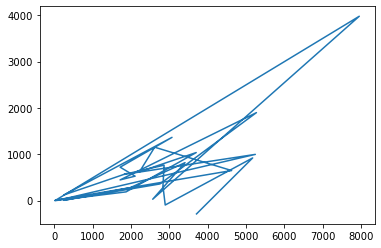

stat=0.630, p=0.000253
Dependent samples
stat=0.762, p=0.000002
Dependent samples


In [12]:
# Correlation Test - pearson & spearman rank correlation , assumption is identical and normal distribution
firstsample = data[1:30]['Sales']
secondsample = data[1:30]['Profit']
pyplot.plot(firstsample,secondsample)
pyplot.show()

# spearman correlation
from scipy.stats import spearmanr
stat, p = spearmanr(firstsample,secondsample)
print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('Independent samples')
else:
    print('Dependent samples')
    
# Pearson correlation
from scipy.stats import pearsonr
stat, p = pearsonr(firstsample,secondsample)
print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('Independent samples')
else:
    print('Dependent samples')

In [13]:
data.corr(method = 'pearson')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.038431
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025491
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.767835
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.271804
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.078153
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354423
Shipping Cost,-0.038431,-0.025491,0.767835,0.271804,-0.078153,0.354423,1.000000


In [14]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
